In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [31]:
df = pd.read_csv("song_data.csv")

In [32]:
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [33]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [35]:
songs=df.drop_duplicates(keep="first")
songs

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [36]:
songs_data = songs.drop('song_name', axis=1)
songs_data

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [37]:
minmax = MinMaxScaler(feature_range=(0,1))
minmax_df = minmax.fit_transform(songs_data)
songs_data_scaled = pd.DataFrame(minmax_df, columns=songs_data.columns)
songs_data_scaled

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.73,0.140059,0.005541,0.502533,0.682342,0.000029,0.727273,0.049226,0.859242,1.0,0.031243,0.689425,0.8,0.481707
1,0.66,0.114658,0.010340,0.549139,0.853697,0.000000,0.272727,0.099580,0.801948,0.0,0.052922,0.434371,0.8,0.376016
2,0.76,0.122938,0.008202,0.746707,0.462888,0.448345,0.000000,0.250333,0.766734,1.0,0.084166,0.511233,0.8,0.329268
3,0.74,0.114658,0.026505,0.456940,0.970940,0.003561,0.000000,0.093426,0.838352,1.0,0.113709,0.505303,0.8,0.201220
4,0.56,0.118514,0.000957,0.452888,0.766517,0.000000,0.909091,0.104707,0.835204,1.0,0.033262,0.709856,0.8,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,0.60,0.082606,0.896586,0.506586,0.150241,0.000066,1.000000,0.102656,0.561569,1.0,0.036982,0.470328,0.8,0.304878
14922,0.60,0.108354,0.768072,0.501520,0.160262,0.000001,1.000000,0.096503,0.611850,0.0,0.031987,0.389100,0.8,0.269309
14923,0.23,0.095231,0.850401,0.728470,0.324602,0.000000,0.000000,0.117014,0.657845,1.0,0.037726,0.538689,0.8,0.290650
14924,0.55,0.190383,0.948795,0.494428,0.325604,0.015747,0.272727,0.110860,0.662850,1.0,0.034857,0.437702,0.8,0.328252


In [41]:
corr_matrix = songs_data.corr()
corr_matrix

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.007766,-0.031658,0.056415,-0.016468,-0.093032,-0.003878,-0.038553,0.052114,0.008824,-0.001971,-0.029560,0.023307,-0.043963
song_duration_ms,-0.007766,1.000000,-0.113314,-0.089338,0.096375,-0.024850,-0.006749,0.020757,0.027837,-0.028056,-0.079438,0.013608,0.004080,-0.069763
acousticness,-0.031658,-0.113314,1.000000,-0.171859,-0.679235,0.179259,-0.000632,-0.085242,-0.569681,0.059443,-0.085435,-0.144736,-0.151180,-0.126915
danceability,0.056415,-0.089338,-0.171859,1.000000,0.053657,-0.124926,0.007599,-0.094373,0.173495,-0.099039,0.200715,-0.127313,0.136211,0.350012
energy,-0.016468,0.096375,-0.679235,0.053657,1.000000,-0.221755,0.014653,0.175979,0.765706,-0.049040,0.072138,0.182517,0.143516,0.315023
instrumentalness,-0.093032,-0.024850,0.179259,-0.124926,-0.221755,1.000000,-0.008496,-0.039821,-0.398912,-0.018852,-0.076705,-0.041032,-0.068656,-0.197783
key,-0.003878,-0.006749,-0.000632,0.007599,0.014653,-0.008496,1.000000,-0.003254,0.008002,-0.174955,0.028565,-0.005033,-0.008750,0.023626
liveness,-0.038553,0.020757,-0.085242,-0.094373,0.175979,-0.039821,-0.003254,1.000000,0.111716,-0.001729,0.094229,0.025681,0.014792,0.016572
loudness,0.052114,0.027837,-0.569681,0.173495,0.765706,-0.398912,0.008002,0.111716,1.000000,-0.055793,0.078418,0.140217,0.112596,0.209803
audio_mode,0.008824,-0.028056,0.059443,-0.099039,-0.049040,-0.018852,-0.174955,-0.001729,-0.055793,1.000000,-0.110686,0.021863,-0.020789,0.002254


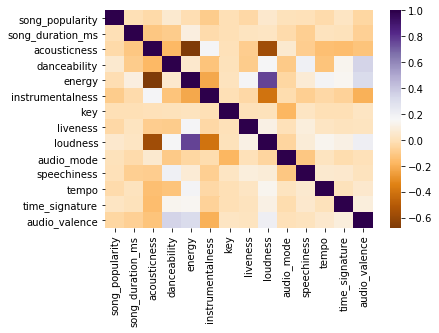

In [42]:
sns.heatmap(corr_matrix, cmap='PuOr')